# Kaggle - Titanic: Machine Learning from Disaster

Version history:
- v1.0 Initial version
- v1.1
 + Empty ages are filled with a random number between (mean - standard deviation) and (mean + standard deviation)
 + Convert Pclass in a categorical field
 + Add noise variables to create a more generic model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns # Used in distribution graphics
import matplotlib.pyplot as plt # Used in distribution graphics

%matplotlib inline

For this competition we will work with two files:
- train.csv --> The training set
 + PassengerId - a unique identifier for each passenger
 + Survived - 0=No 1=Yes
 + Pclass - 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
 + Name - name of the passenger
 + Sex - male/female
 + Age - age of the passenger in years. Fractional if less than 1. And x.5 if estimated
 + SibSp - number of siblings/spouse
 + Parch - number of parents/children
 + Ticket - ticket number
 + Fare - price of the ticket
 + Cabin - cabin number
 + Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- test.csv --> The test set
 + PassengerId - a unique identifier for each passenger
 + Pclass - 1 = 1st(Upper), 2 = 2nd(Middle), 3 = 3rd(Lower)
 + Name - name of the passenger
 + Sex - male/female
 + Age - age of the passenger in years. Fractional if less than 1. And x.5 if estimated
 + SibSp - number of siblings/spouse
 + Parch - number of parents/children
 + Ticket - ticket number
 + Fare - price of the ticket
 + Cabin - cabin number
 + Embarked - port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
train_df = pd.read_csv("./train.csv")

In [4]:
train_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S
605,606,0,3,"Lindell, Mr. Edvard Bengtsson",male,36.0,1,0,349910,15.5500,NaN,S
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
335,336,0,3,"Denkoff, Mr. Mitto",male,NaN,0,0,349225,7.8958,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
189,190,0,3,"Turcin, Mr. Stjepan",male,36.0,0,0,349247,7.8958,NaN,S


Size of the data

In [5]:
train_df.shape

(891, 12)

Statistical description of the data (only numerical fields)

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age is null in some rows

Statistical description of the data (categorical fields)

In [7]:
train_df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",male,1601,B96 B98,S
freq,1,577,7,4,644


- 2 rows without Embarked field

Missing values in the training dataset

In [8]:
aux = train_df.isnull().sum()
aux[aux>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

Open the test file and keep a backup of both training and test datasets before cleaning them

In [9]:
test_df = pd.read_csv("./test.csv")
train_df_orig = train_df.copy()
test_df_orig = test_df.copy()

Missing values in the test dataset

In [10]:
aux = test_df.isnull().sum()
aux[aux>0]

Age       86
Fare       1
Cabin    327
dtype: int64

Remove unuseful columns in training and test dataset. Columns as Name, Ticket and Cabin are unique (or almost unique) per user, so they don't give information.

In [11]:
train_df = train_df.drop(["Name", "Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Name", "Ticket", "Cabin"], axis=1)

In [12]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [13]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [14]:
train_df.shape

(891, 9)

In [15]:
test_df.shape

(418, 8)

Remove 2 rows in training dataset with embarked field empty.

In [16]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38.0,0,0,80.0,NaN
829,830,1,1,female,62.0,0,0,80.0,NaN


In [17]:
train_df=train_df[train_df["Embarked"].isnull()==False]

In [18]:
train_df.shape

(889, 9)

In [19]:
aux = train_df.isnull().sum()
aux[aux>0]

Age    177
dtype: int64

In [20]:
aux = test_df.isnull().sum()
aux[aux>0]

Age     86
Fare     1
dtype: int64

There are a lot of rows with Age field empty. If we just remove them, we will lose a lot of data, so we need to think in other solution.
Our first approach is to fill this empty fields with the mean.  
++ v1.1 ++  
Empty ages are filled with a random number between (mean - standard deviation) and (mean + standard deviation)

In [21]:
train_df["Age"].mean()

29.64209269662921

In [22]:
train_df["Age"].std()

14.49293290032352

In [23]:
np.isnan(train_df["Age"]).head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: Age, dtype: bool

In [24]:
# ++ v1.1 ++
# train_df["Age"]=train_df["Age"].fillna(train_df["Age"].mean())
Age_avg = train_df["Age"].mean()
Age_std = train_df["Age"].std()
Age_null_count = train_df["Age"].isnull().sum()
Age_null_random_list = np.random.randint(Age_avg - Age_std, Age_avg + Age_std, size=Age_null_count)
train_df["Age"][np.isnan(train_df["Age"])] = Age_null_random_list
train_df["Age"] = train_df["Age"].astype(int)

In [25]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S
5,6,0,3,male,15,0,0,8.4583,Q
6,7,0,1,male,54,0,0,51.8625,S
7,8,0,3,male,2,3,1,21.0750,S
8,9,1,3,female,27,0,2,11.1333,S
9,10,1,2,female,14,1,0,30.0708,C


In [26]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.572553,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.482704,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
train_df[train_df["Age"].isnull()].head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [28]:
test_df.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
5,897,3,male,14.0,0,0,9.2250,S
6,898,3,female,30.0,0,0,7.6292,Q
7,899,2,male,26.0,1,1,29.0000,S
8,900,3,female,18.0,0,0,7.2292,C
9,901,3,male,21.0,2,0,24.1500,S


In [29]:
test_df["Age"]=test_df["Age"].fillna(train_df["Age"].mean())

In [30]:
test_df.head(15)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.500000,0,0,7.8292,Q
1,893,3,female,47.000000,1,0,7.0000,S
2,894,2,male,62.000000,0,0,9.6875,Q
3,895,3,male,27.000000,0,0,8.6625,S
4,896,3,female,22.000000,1,1,12.2875,S
5,897,3,male,14.000000,0,0,9.2250,S
6,898,3,female,30.000000,0,0,7.6292,Q
7,899,2,male,26.000000,1,1,29.0000,S
8,900,3,female,18.000000,0,0,7.2292,C
9,901,3,male,21.000000,2,0,24.1500,S


In [31]:
train_df["Fare"].mean()

32.09668087739029

In [32]:
test_df[test_df["Fare"].isnull()].head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,NaN,S


In [33]:
test_df["Fare"]=test_df["Fare"].fillna(train_df["Fare"].mean())

In [34]:
aux = test_df.isnull().sum()
aux[aux>0]

Series([], dtype: int64)

In [35]:
test_df[test_df["PassengerId"]==1044]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,male,60.5,0,0,32.096681,S


Convert categorical fields (Sex and Embarked) in numerical ones. As the ID is numeric we don't need to remove it.  
++ v1.1 ++  
Convert also Pclass in a categorical field.

In [36]:
train_df.loc[train_df["Pclass"]==1,"Pclass"]="First"
train_df.loc[train_df["Pclass"]==2,"Pclass"]="Second"
train_df.loc[train_df["Pclass"]==3,"Pclass"]="Third"

In [37]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,Third,male,22,1,0,7.2500,S
1,2,1,First,female,38,1,0,71.2833,C
2,3,1,Third,female,26,0,0,7.9250,S
3,4,1,First,female,35,1,0,53.1000,S
4,5,0,Third,male,35,0,0,8.0500,S
5,6,0,Third,male,15,0,0,8.4583,Q
6,7,0,First,male,54,0,0,51.8625,S
7,8,0,Third,male,2,3,1,21.0750,S
8,9,1,Third,female,27,0,2,11.1333,S
9,10,1,Second,female,14,1,0,30.0708,C


In [38]:
train_df.describe(include=object)

,Pclass,Sex,Embarked
count,889,889,889
unique,3,2,3
top,Third,male,S
freq,491,577,644


In [39]:
train_df_num = pd.get_dummies(train_df)

In [40]:
train_df_num.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_First,Pclass_Second,Pclass_Third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35,1,0,53.1000,1,0,0,1,0,0,0,1
4,5,0,35,0,0,8.0500,0,0,1,0,1,0,0,1
5,6,0,15,0,0,8.4583,0,0,1,0,1,0,1,0
6,7,0,54,0,0,51.8625,1,0,0,0,1,0,0,1
7,8,0,2,3,1,21.0750,0,0,1,0,1,0,0,1
8,9,1,27,0,2,11.1333,0,0,1,1,0,0,0,1
9,10,1,14,1,0,30.0708,0,1,0,1,0,1,0,0


In [41]:
test_df.loc[test_df["Pclass"]==1,"Pclass"]="First"
test_df.loc[test_df["Pclass"]==2,"Pclass"]="Second"
test_df.loc[test_df["Pclass"]==3,"Pclass"]="Third"

In [42]:
test_df_num = pd.get_dummies(test_df)

In [43]:
test_df_num.head(10)

,PassengerId,Age,SibSp,Parch,Fare,Pclass_First,Pclass_Second,Pclass_Third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1
5,897,14.0,0,0,9.2250,0,0,1,0,1,0,0,1
6,898,30.0,0,0,7.6292,0,0,1,1,0,0,1,0
7,899,26.0,1,1,29.0000,0,1,0,0,1,0,0,1
8,900,18.0,0,0,7.2292,0,0,1,1,0,1,0,0
9,901,21.0,2,0,24.1500,0,0,1,0,1,0,0,1


Check that both training and test dataframes have the same columns. Depending on the values of the categorical fields there could be differences.

In [44]:
np.array(train_df_num.columns)

array(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare',
       'Pclass_First', 'Pclass_Second', 'Pclass_Third', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [45]:
np.array(test_df_num.columns)

array(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_First',
       'Pclass_Second', 'Pclass_Third', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [46]:
np.array(train_df_num.columns.drop("Survived")) == np.array(test_df_num.columns)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

Keep a backup of the dataset cleaned and converted to numeric.

In [47]:
train_df_num.to_csv("train_clean_numeric.csv", index=None)
test_df_num.to_csv("test_clean_numeric.csv", index=None)

Check that there are no atypical values (negative, huge values,...)

In [48]:
print(train_df_num.shape)
train_df_num.describe()

(889, 14)


,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_First,Pclass_Second,Pclass_Third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,29.572553,0.524184,0.382452,32.096681,0.240720,0.206974,0.552306,0.350956,0.649044,0.188976,0.086614,0.724409
std,256.998173,0.486260,13.482704,1.103705,0.806761,49.697504,0.427761,0.405365,0.497536,0.477538,0.477538,0.391710,0.281427,0.447063
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
train_df_num.describe().loc[["min","max"]]

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_First,Pclass_Second,Pclass_Third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
min,1.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,891.0,1.0,80.0,8.0,6.0,512.3292,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [50]:
print(test_df_num.shape)
test_df_num.describe()

(418, 13)


,PassengerId,Age,SibSp,Parch,Fare,Pclass_First,Pclass_Second,Pclass_Third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.128564,0.447368,0.392344,35.618742,0.255981,0.222488,0.521531,0.363636,0.636364,0.244019,0.110048,0.645933
std,120.810458,12.637710,0.896760,0.981429,55.840767,0.436934,0.416416,0.500135,0.481622,0.481622,0.430019,0.313324,0.478803
min,892.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,29.572553,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1204.750000,35.750000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1309.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
test_df_num.describe().loc[["min","max"]]

,PassengerId,Age,SibSp,Parch,Fare,Pclass_First,Pclass_Second,Pclass_Third,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
min,892.0,0.17,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1309.0,76.00,8.0,9.0,512.3292,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


The datasets are very simple, so there is no need to create new synthetic variables.

## Exploratory data analysis (EDA)

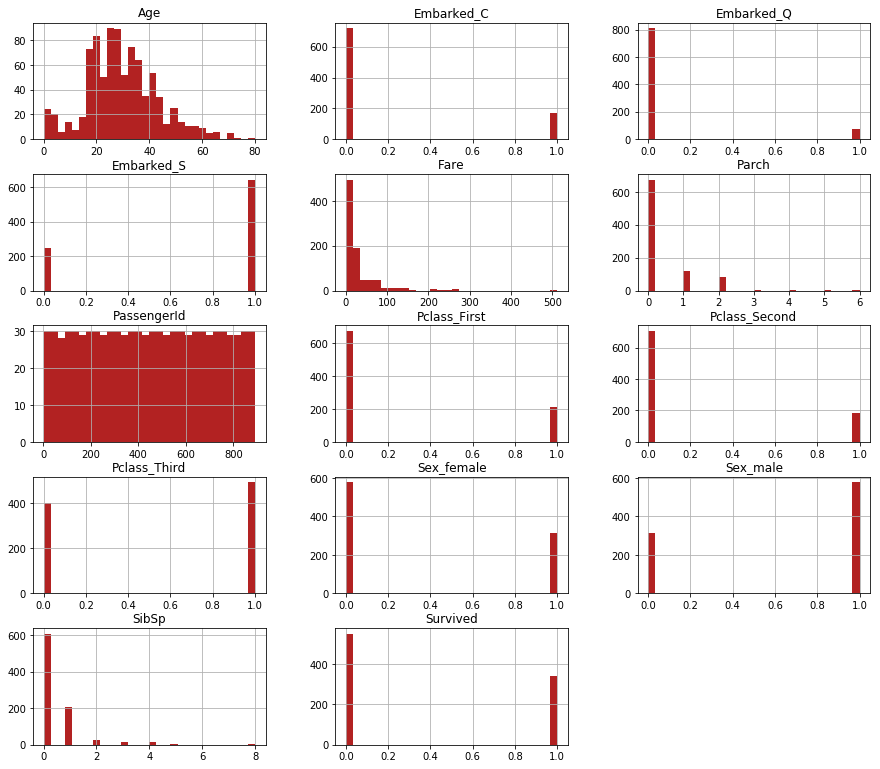

In [52]:
# bins --> max number of blocks in the graph
train_df_num.hist(color='firebrick', bins=30, layout=(11,3), figsize=(15,30));

There is a peak in the age because we have filled the empty fields with the same value (the average).  
++ v1.1 ++  
The peak has disappeared

Distribution graphics for each variable.

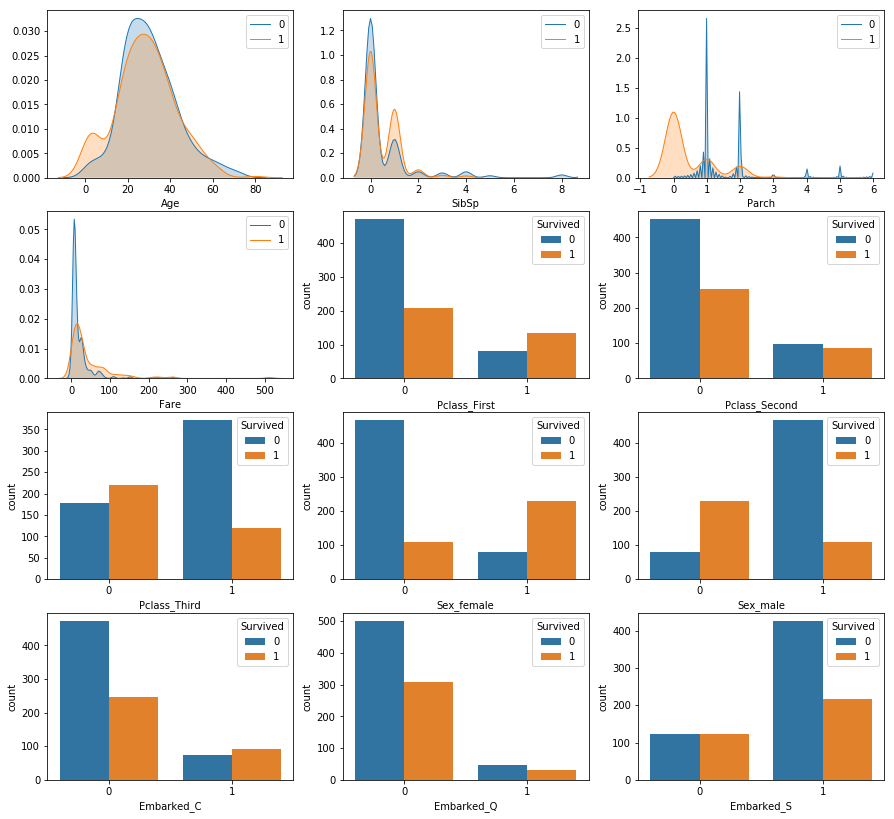

In [53]:
clases = np.unique(train_df_num["Survived"])
cols = list(train_df_num.columns)
cols.remove("Survived")
cols.remove("PassengerId")

plt.figure(figsize=(15,40))

for i,col in enumerate(cols):
    plt.subplot(11,3,i+1)
    if len(np.unique(train_df_num[col]))>2:
        for c in clases:
            sns.distplot(train_df_num[train_df_num["Survived"]==c][col], hist=False, kde=True,
                         kde_kws = {'shade': True, 'linewidth': 1}, 
                         label = c)
    else:
        sns.countplot(x=col, hue="Survived", data=train_df_num)

- There is a peak of Survived=0 in Pclass_Third=1. It was less likely to survive in third class.
- There is a peak of Survived=1 in Parch=0
- There is a peak of Survived=0 in Parch=1
- There is a peak of Survived=0 in Sex_male=1. It was more likely to survive if you were a woman.
- There is a peak of Survived=0 in Embarked_S=1. It was less likely to survive if you embarked in Southamptom.

Calculate the correlation between parameters and generate a heatmap

In [54]:
corr = train_df_num.corr()
corr.shape

(14, 14)

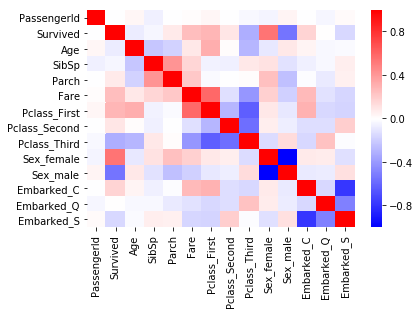

In [55]:
sns.heatmap(corr, cmap="bwr", vmax=1, vmin=-1);

- As expected, Fare and Pclass are related (Pclass_First=1 -> high Fare, Pclass_Third=1 -> low Fare).
- As we saw in the distribution graphics, Sex_male and Sex_female are related with Survived.
- As we saw in the distribution graphics, Pclass (and therefore Fare) are related with Survived.
- Parch and SibSp are also related. If you travel with your children, it's very likely that you also travel with your siblings/spouse (and vice versa)

Generate a hierarchically-clustered heatmap

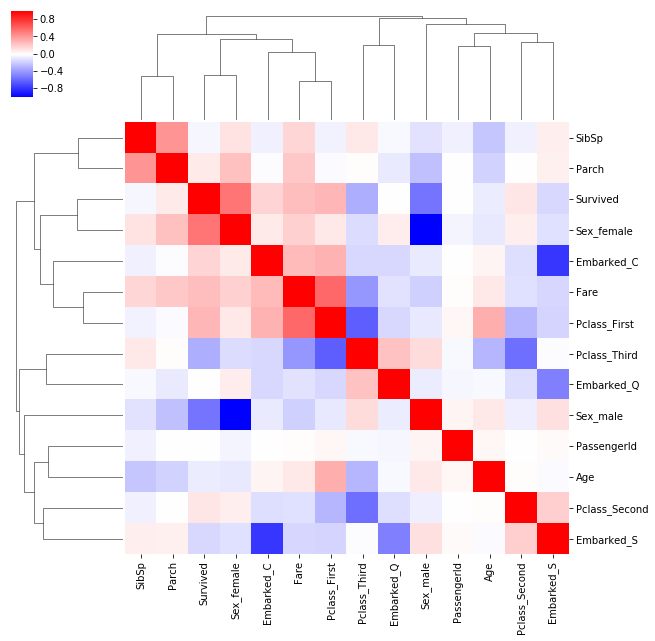

In [56]:
# Variables ordered by their equality in behaviour
sns.clustermap(corr, cmap="bwr", vmax=1, vmin=-1);

Variables more related are
- Sex_Female and Survived
- SibSp and Parch

In [57]:
# Ranking with variables sorted from more correlated with the target to less correlated (in absulute value)
corr["Survived"].abs().sort_values()[::-1] # Sort descendant with stride -1 [begin:end:step]

Survived         1.000000
Sex_male         0.541585
Sex_female       0.541585
Pclass_Third     0.320171
Pclass_First     0.282368
Fare             0.255290
Embarked_C       0.169966
Embarked_S       0.151777
Pclass_Second    0.095002
Parch            0.083151
Age              0.071742
SibSp            0.034040
PassengerId      0.005028
Embarked_Q       0.004536
Name: Survived, dtype: float64

As we saw in the correlation matrix Sex and Pclass are the most related variables to Survived.

++ v1.1 ++  
Add noise variables to create a more generic model.

In [61]:
train_df_num.shape

(889, 14)

In [62]:
train_df_num["x1"] = np.random.randn(len(train_df_num))
train_df_num["x2"] = np.random.randn(len(train_df_num))
train_df_num["x3"] = np.random.randn(len(train_df_num))

In [63]:
train_df_num.shape

(889, 17)

In [64]:
corr2 = train_df_num.corr()
corr2["Survived"].abs().sort_values()[::-1]

Survived         1.000000
Sex_male         0.541585
Sex_female       0.541585
Pclass_Third     0.320171
Pclass_First     0.282368
Fare             0.255290
Embarked_C       0.169966
Embarked_S       0.151777
Pclass_Second    0.095002
Parch            0.083151
Age              0.071742
x2               0.059818
SibSp            0.034040
x3               0.018690
PassengerId      0.005028
Embarked_Q       0.004536
x1               0.001262
Name: Survived, dtype: float64

++ v1.1 ++  
We also include these noise variables in test dataset

In [70]:
test_df_num.shape

(418, 13)

In [71]:
test_df_num["x1"] = np.random.randn(len(test_df_num))
test_df_num["x2"] = np.random.randn(len(test_df_num))
test_df_num["x3"] = np.random.randn(len(test_df_num))

In [72]:
test_df_num.shape

(418, 16)

### Defining matrix "X" and target "y"

For the training and test datasets we remove the ID and the target variable.

In [73]:
# Convert the training dataframe into an array
X      = train_df_num.drop(["PassengerId","Survived"], axis=1).values
y      = train_df_num["Survived"].values
IDs_train = train_df_num["PassengerId"].values

# Test:
X_test = test_df_num.drop(["PassengerId"], axis=1).values
IDs_test = test_df_num["PassengerId"].values

### Training-validation split

In [74]:
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3,
                                          random_state=1)
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((622, 15), (267, 15), (622,), (267,))

As we can see, data is not standardized (stardard deviation!=0)

In [75]:
X_tr.std(axis=0)

array([13.83646382,  1.10209795,  0.83750794, 40.13830573,  0.4207706 ,
        0.40774253,  0.49644886,  0.4755827 ,  0.4755827 ,  0.38689569,
        0.27435492,  0.44147863,  1.0097219 ,  1.02088886,  1.00920415])

### Data standardization

There are models (like neuronal networks) that need standardized data.
We use Standar Scaler --> X_standardized = (X - X_mean)/X_std

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_tr)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [77]:
X_tr_sc = sc.transform(X_tr) # Training
X_te_sc = sc.transform(X_te) # Validation
X_test_sc = sc.transform(X_test) # Test

categorical = []
for i in range(X_tr.shape[1]):
    if len(np.unique(X_tr[:,i]))<=2: # Columns with 2 or less different values
        categorical.append(i)

# Categorical variables are not standardized. Values recovered from pre-standardized data
X_tr_sc[:,categorical]   = X_tr[:,categorical]
X_te_sc[:,categorical]   = X_te[:,categorical]
X_test_sc[:,categorical] = X_test[:,categorical]

X_tr_sc.std(axis=0) # Non -standardized variables has standard deviation = 1

array([1.        , 1.        , 1.        , 1.        , 0.4207706 ,
       0.40774253, 0.49644886, 0.4755827 , 0.4755827 , 0.38689569,
       0.27435492, 0.44147863, 1.        , 1.        , 1.        ])

In [78]:
X_tr_sc

array([[-0.63418802, -0.45659774, -0.46839312, ..., -1.85358655,
         1.0855558 ,  1.10565452],
       [-0.12827841,  0.45076263, -0.46839312, ..., -1.59494709,
         0.33834422,  0.50624361],
       [-0.70646082, -0.45659774, -0.46839312, ..., -0.72731141,
         0.40512938, -0.0366874 ],
       ...,
       [-0.27282402,  0.45076263, -0.46839312, ..., -0.49075171,
        -1.83363308, -0.40746961],
       [ 1.02808641,  0.45076263, -0.46839312, ...,  0.76608877,
        -1.11697571,  0.69407723],
       [-0.63418802, -0.45659774, -0.46839312, ..., -1.39501763,
         0.68436253,  2.02227052]])

In [79]:
X_tr_sc.mean(axis=0)

array([ 1.31191949e-16, -4.53638556e-16, -9.10311483e-17,  9.80994492e-16,
        2.29903537e-01,  2.10610932e-01,  5.59485531e-01,  3.45659164e-01,
        6.54340836e-01,  1.83279743e-01,  8.19935691e-02,  7.34726688e-01,
        4.42661270e-17,  2.69523596e-17, -2.49889427e-17])

In [80]:
X_tr_sc.std(axis=0)

array([1.        , 1.        , 1.        , 1.        , 0.4207706 ,
       0.40774253, 0.49644886, 0.4755827 , 0.4755827 , 0.38689569,
       0.27435492, 0.44147863, 1.        , 1.        , 1.        ])

### PCA visualization

We use this kind of visualization to see if the points cloud of target=0 and target=1 are overlapped (complex problem) or not (simple problem). We use it only with numerical variables.

In [83]:
from sklearn.decomposition import PCA
pca = PCA() # You can use the parameter n_components to keep only the first n components.
num_columns=range(0,4) # Numeric columns (number 1,2,3 and 4). Categorical converted into numerical (0 or 1) are not included.
pca.fit(X_tr_sc[:,num_columns])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [84]:
X_tr_pca = pca.transform(X_tr_sc[:,num_columns]) # Only transform (already fit) and with numeric columns.
X_te_pca = pca.transform(X_te_sc[:,num_columns])

X_tr_sc.shape, X_tr_pca.shape, X_te_sc.shape, X_te_pca.shape

((622, 15), (622, 4), (267, 15), (267, 4))

In [85]:
X_tr_pca

array([[-0.59569739, -0.81419578,  0.319172  ,  0.06035191],
       [-0.02931693, -0.21825296,  0.04599231, -0.6389892 ],
       [-0.57243543, -0.86910384,  0.35955985,  0.0671243 ],
       ...,
       [-0.08683694, -0.47826911, -0.0347478 , -0.63484778],
       [-0.35902324,  0.7216083 , -0.5342601 , -0.74350765],
       [-0.59436973, -0.81227915,  0.32123304,  0.0604719 ]])

In [86]:
X_tr[:,num_columns]

array([[21.    ,  0.    ,  0.    ,  7.925 ],
       [28.    ,  1.    ,  0.    , 24.    ],
       [20.    ,  0.    ,  0.    ,  8.05  ],
       ...,
       [26.    ,  1.    ,  0.    , 14.4542],
       [44.    ,  1.    ,  0.    , 26.    ],
       [21.    ,  0.    ,  0.    ,  8.05  ]])

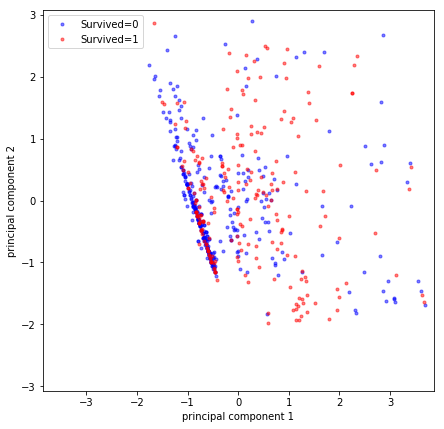

In [87]:
# You can change which PCA components you want to display (0 and 1, 1 and 2,...)
comp_horiz=0
comp_vert =1

plt.figure(figsize=(7,7))
plt.plot(X_tr_pca[y_tr==0,comp_horiz],
         X_tr_pca[y_tr==0,comp_vert], '.', label="Survived=0",
         alpha=0.5, color="blue")
plt.plot(X_tr_pca[y_tr==1,comp_horiz],
         X_tr_pca[y_tr==1,comp_vert], '.', label="Survived=1",
         alpha=0.5, color="red")
m_horiz   = X_tr_pca[:,comp_horiz].mean()
std_horiz = X_tr_pca[:,comp_horiz].std()
m_vert    = X_tr_pca[:,comp_vert].mean()
std_vert  = X_tr_pca[:,comp_vert].std()
plt.axis([m_horiz-3*std_horiz, m_horiz+3*std_horiz,
          m_vert-3*std_vert,   m_vert+3*std_vert])
plt.xlabel('principal component '+str(comp_horiz+1))
plt.ylabel('principal component '+str(comp_vert+1))
plt.legend();

## Dummy classifier (baseline)

The dummy classifier is based on simple rules. Real classifiers should be better than these ones. There are several strategies to follow:
    - Most frequent: Just take the most frequent label in the training dataset.
    - Stratified: Generates predictions by respecting the training dataset’s class distribution.

In [88]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier(strategy='most_frequent')
clf_dummy.fit(X_tr,y_tr)

print("Scoring training:", clf_dummy.score(X_tr, y_tr))
print("Scoring test    :", clf_dummy.score(X_te, y_te))

Scoring training: 0.6157556270096463
Scoring test    : 0.6217228464419475


In [89]:
clf_dummy = DummyClassifier(strategy='stratified')
clf_dummy.fit(X_tr,y_tr)

print("Scoring training:", clf_dummy.score(X_tr, y_tr))
print("Scoring test    :", clf_dummy.score(X_te, y_te))

Scoring training: 0.5305466237942122
Scoring test    : 0.49812734082397003


## Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(solver='lbfgs')
clf_lr.fit(X_tr_sc, y_tr)

print("Scoring training:", clf_lr.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_lr.score(X_te_sc, y_te))

Scoring training: 0.7861736334405145
Scoring test    : 0.8164794007490637


## Neural network

In [91]:
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron
from sklearn.metrics import log_loss # log-loss is based on how much the prediction varies from the actual label.

N_iters = 1000
architecture = (5,) # one single hidden layer with 5 neurons.

X_tr1_sc, X_tr2_sc, y_tr1, y_tr2 = train_test_split(X_tr_sc, y_tr,
                                                    test_size=0.3,
                                                    random_state=1)

# X_tr2, y_tr2 is the validation dataset to avoid overfitting in training.
clf_nn = MLPClassifier(verbose=True, max_iter=1, random_state=7,
                       hidden_layer_sizes=architecture,
                       early_stopping=False, warm_start=True)
# max_iter -> number of epochs (solver is 'adam')
# early_stopping -> finish if validation score is not improving
best_loss_in_val = 1e20
for i in range(N_iters):
    clf_nn.fit(X_tr1_sc, y_tr1)
    loss_val = log_loss(y_tr2, clf_nn.predict_proba(X_tr2_sc))
    if loss_val < best_loss_in_val:
        best_weights = clf_nn.coefs_.copy()
        best_loss_in_val = loss_val
        print("nnet improvement in validation")

clf_nn.coefs_ = best_weights
print("Scoring training:", clf_nn.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_nn.score(X_te_sc, y_te))

Iteration 1, loss = 0.79044667
nnet improvement in validation
Iteration 2, loss = 0.78488298
nnet improvement in validation
Iteration 3, loss = 0.77966019
nnet improvement in validation
Iteration 4, loss = 0.77468823
nnet improvement in validation
Iteration 5, loss = 0.76989626
nnet improvement in validation
Iteration 6, loss = 0.76522345
nnet improvement in validation
Iteration 7, loss = 0.76067373
nnet improvement in validation
Iteration 8, loss = 0.75627045
nnet improvement in validation
Iteration 9, loss = 0.75199991
nnet improvement in validation
Iteration 10, loss = 0.74786697
nnet improvement in validation
Iteration 11, loss = 0.74386495
nnet improvement in validation
Iteration 12, loss = 0.73996211
nnet improvement in validation
Iteration 13, loss = 0.73616127
nnet improvement in validation
Iteration 14, loss = 0.73243910
nnet improvement in validation
Iteration 15, loss = 0.72879766
nnet improvement in validation
Iteration 16, loss = 0.72524105
nnet improvement in validation
I

C:\Users\albher\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



nnet improvement in validation
Iteration 44, loss = 0.64656685
nnet improvement in validation
Iteration 45, loss = 0.64430306
nnet improvement in validation
Iteration 46, loss = 0.64206945
nnet improvement in validation
Iteration 47, loss = 0.63987119
nnet improvement in validation
Iteration 48, loss = 0.63771161
nnet improvement in validation
Iteration 49, loss = 0.63558611
nnet improvement in validation
Iteration 50, loss = 0.63349523
nnet improvement in validation
Iteration 51, loss = 0.63142973
nnet improvement in validation
Iteration 52, loss = 0.62939659
nnet improvement in validation
Iteration 53, loss = 0.62738011
nnet improvement in validation
Iteration 54, loss = 0.62538171
nnet improvement in validation
Iteration 55, loss = 0.62340634
nnet improvement in validation
Iteration 56, loss = 0.62142715
nnet improvement in validation
Iteration 57, loss = 0.61946088
nnet improvement in validation
Iteration 58, loss = 0.61751626
nnet improvement in validation
Iteration 59, loss = 0.

Iteration 187, loss = 0.47520496
nnet improvement in validation
Iteration 188, loss = 0.47469020
nnet improvement in validation
Iteration 189, loss = 0.47418543
nnet improvement in validation
Iteration 190, loss = 0.47367960
nnet improvement in validation
Iteration 191, loss = 0.47317171
nnet improvement in validation
Iteration 192, loss = 0.47267140
nnet improvement in validation
Iteration 193, loss = 0.47218147
nnet improvement in validation
Iteration 194, loss = 0.47170738
nnet improvement in validation
Iteration 195, loss = 0.47123650
nnet improvement in validation
Iteration 196, loss = 0.47077119
nnet improvement in validation
Iteration 197, loss = 0.47030545
nnet improvement in validation
Iteration 198, loss = 0.46985239
nnet improvement in validation
Iteration 199, loss = 0.46941193
nnet improvement in validation
Iteration 200, loss = 0.46898291
nnet improvement in validation
Iteration 201, loss = 0.46855627
nnet improvement in validation
Iteration 202, loss = 0.46812803
nnet im

Iteration 351, loss = 0.43057654
Iteration 352, loss = 0.43041725
Iteration 353, loss = 0.43026718
Iteration 354, loss = 0.43012761
Iteration 355, loss = 0.42999383
Iteration 356, loss = 0.42985719
Iteration 357, loss = 0.42972326
Iteration 358, loss = 0.42959824
Iteration 359, loss = 0.42947383
Iteration 360, loss = 0.42934994
Iteration 361, loss = 0.42922971
Iteration 362, loss = 0.42910969
Iteration 363, loss = 0.42898681
Iteration 364, loss = 0.42886600
Iteration 365, loss = 0.42874542
Iteration 366, loss = 0.42862699
Iteration 367, loss = 0.42851423
Iteration 368, loss = 0.42840174
Iteration 369, loss = 0.42828652
Iteration 370, loss = 0.42817421
Iteration 371, loss = 0.42807609
Iteration 372, loss = 0.42797631
Iteration 373, loss = 0.42786881
Iteration 374, loss = 0.42775627
Iteration 375, loss = 0.42764331
Iteration 376, loss = 0.42752864
Iteration 377, loss = 0.42741805
Iteration 378, loss = 0.42731513
Iteration 379, loss = 0.42721633
Iteration 380, loss = 0.42711854
Iteration 

Iteration 504, loss = 0.41440738
Iteration 505, loss = 0.41430002
Iteration 506, loss = 0.41418749
Iteration 507, loss = 0.41408145
Iteration 508, loss = 0.41398306
Iteration 509, loss = 0.41388415
Iteration 510, loss = 0.41378419
Iteration 511, loss = 0.41368781
Iteration 512, loss = 0.41359773
Iteration 513, loss = 0.41350680
Iteration 514, loss = 0.41341248
Iteration 515, loss = 0.41332327
Iteration 516, loss = 0.41323123
Iteration 517, loss = 0.41315098
Iteration 518, loss = 0.41305962
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 519, loss = 0.41296551
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 520, loss = 0.41287414
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 521, loss = 0.41279449
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 522, loss = 0.41271352
Training loss

Iteration 597, loss = 0.40771961
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 598, loss = 0.40767535
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 599, loss = 0.40763119
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 600, loss = 0.40758056
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 601, loss = 0.40754235
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 602, loss = 0.40750656
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 603, loss = 0.40746871
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 604, loss = 0.40742618
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 605, l

Iteration 694, loss = 0.40142755
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 695, loss = 0.40138589
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 696, loss = 0.40134597
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 697, loss = 0.40128233
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 698, loss = 0.40123202
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 699, loss = 0.40119409
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 700, loss = 0.40114935
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 701, loss = 0.40108705
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 702, l

Iteration 796, loss = 0.39722036
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 797, loss = 0.39719337
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 798, loss = 0.39715563
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 799, loss = 0.39710936
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 800, loss = 0.39707396
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 801, loss = 0.39703965
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 802, loss = 0.39701279
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 803, loss = 0.39699984
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 804, l

Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 882, loss = 0.39499309
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 883, loss = 0.39497157
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 884, loss = 0.39496003
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 885, loss = 0.39495553
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 886, loss = 0.39492384
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 887, loss = 0.39488684
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 888, loss = 0.39484930
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 889, loss = 0.39482711
Training loss di

Iteration 962, loss = 0.39322525
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 963, loss = 0.39322495
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 964, loss = 0.39322407
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 965, loss = 0.39320676
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 966, loss = 0.39317991
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 967, loss = 0.39314916
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 968, loss = 0.39312041
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 969, loss = 0.39310218
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 970, l

## SVM (Support Vector Machines)

Uses a hyperplane to separate the different classes. This hyperplane is the one that has the largest separation between the two classes.
If the two classes are not linearly separable, it adds dimensions by operating with the existing ones (kernel function), so that in this new space the two classes were separable.

In [92]:
from sklearn.svm import SVC

clf_svm = SVC(probability=True,gamma='scale') # Support Vector Classification
clf_svm.fit(X_tr_sc, y_tr)

print("Scoring training:", clf_svm.score(X_tr_sc, y_tr))
print("Scoring test    :", clf_svm.score(X_te_sc, y_te))

Scoring training: 0.8279742765273312
Scoring test    : 0.8352059925093633


## Random Forest

Constructs a large number of decision trees at training time and outputs the most frequent class (mode) for classification problems.

In [93]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=1001,
                                max_features=None, n_jobs=-1
#                               max_depth=15, 
                               )

clf_rf.fit(X_tr, y_tr)
print("Scoring training:", clf_rf.score(X_tr, y_tr))
print("Scoring test    :", clf_rf.score(X_te, y_te))

Scoring training: 1.0
Scoring test    : 0.8726591760299626


In [94]:
X_sc = sc.transform(X)
clf_rf.fit(X, y) # train again the model with all the data

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1001, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
print("Scoring training (all data):", clf_rf.score(X, y))

Scoring training (all data): 1.0


## Gradient Boosting

Combines weak prediction models into a single strong learner. Unlike Random Forest (bagging) it gives more weight to misclassified examples (it's more likely that these examples appear in the next iteration's dataset).

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_tr, y_tr)
print("Scoring training:", clf_gb.score(X_tr, y_tr))
print("Scoring test    :", clf_gb.score(X_te, y_te))

Scoring training: 0.9147909967845659
Scoring test    : 0.8239700374531835


In [97]:
clf_gb.fit(X, y) # train again the model with all the data

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [98]:
print("Scoring training (all data):", clf_gb.score(X, y))

Scoring training (all data): 0.8998875140607424


## Decision Trees

Combines weak prediction models into a single strong learner. Unlike Random Forest (bagging) it gives more weight to misclassified examples (it's more likely that these examples appear in the next iteration's dataset).

In [99]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_tr, y_tr)
print("Scoring training:", clf_dt.score(X_tr, y_tr))
print("Scoring test    :", clf_dt.score(X_te, y_te))

Scoring training: 1.0
Scoring test    : 0.7602996254681648


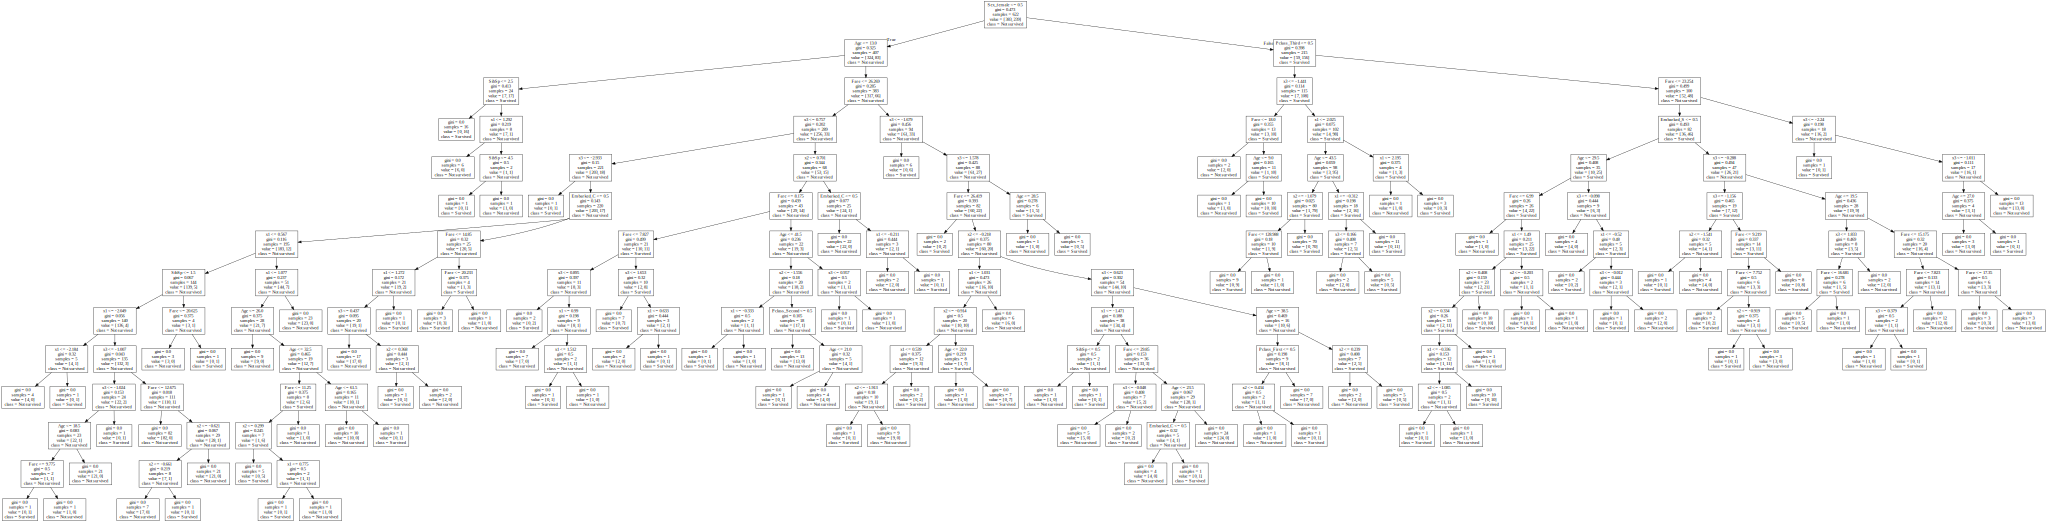

In [100]:
# In newer versions of sklearn (from 0.21) we can use sklearn.tree.plot_tree or export_text
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(clf_dt, out_file=None,
                           feature_names=train_df_num.drop(["PassengerId","Survived"], axis=1).columns,
                           class_names=['Not survived','Survived'], label='all')
graph = graphviz.Source(dot_data)
graph
# Value = [elements category 1 (Not Survived), elements category 2 (Survived)] --> addition=samples
# class -> class with greatest number of samples
# gini = 0 --> all the elements belong to one class
# gini = 0.5 --> elements even distributed among classes (50% Survived, 50% Not Survived, in our example)
# Always chooses the variable with the lowest gini in the root. And then the lowest of the rest of variables in the next level.
# 1 - (((383/622)^2) + ((239/622)^2)) = 0.473

# Predictions in test dataset

Choose one model

In [126]:
opcion = 6

# 1: logistic regression
# 2: neural network
# 3: SVM
# 4: random forest
# 5: gradient boosting
# 6: decision tree

if opcion == 1:
    clf = clf_lr
    X_test_aux = X_test_sc
    model="lr"
if opcion == 2:
    clf = clf_nn
    X_test_aux = X_test_sc
    model="nn"
if opcion == 3:
    clf = clf_svm
    X_test_aux = X_test_sc
    model="svm"
elif opcion == 4:
    clf = clf_rf
    X_test_aux = X_test
    model="rf"
elif opcion == 5:
    clf = clf_gb
    X_test_aux = X_test
    model="gb"
elif opcion == 6:
    clf = clf_dt
    X_test_aux = X_test
    model="dt"

In [127]:
#prob_surv_test=clf.predict_proba(X_test_aux) # Returns the probability between 0 and 1
prob_surv_test=clf.predict(X_test_aux) # Returns 0 or 1

In [128]:
predictions = pd.DataFrame({"PassengerId":IDs_test,
                             "Survived":prob_surv_test})
predictions[:5]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [129]:
predictions.shape

(418, 2)

In [130]:
version="1.1"
predictions.to_csv('gender_submission_'+model+'_v'+version+'.csv',index=False)

### Results:

v1
* **Regresión Logística:** 0.76076 ---> 76% de acierto (100 fallos)
* **Neural Network:** 0.75598 ---> 76% de acierto (102 fallos)
* **SVM:** 0.78468 ---> 78% de acierto (90 fallos)
* **Random Forest (RF):** 0.73684 ---> 74% de acierto (110 fallos)
* **Gradient Boosting (GB):** 0.78468 ---> 78% de acierto (90 fallos)
* **Decision Tree:** 0.68899 ---> 69% de acierto (130 fallos)

v1.1
* **Regresión Logística:** 0.75598 ---> 76% de acierto (102 fallos)
* **Regresión Logística:** 0.74641 ---> 75% de acierto (106 fallos)
* **Neural Network:** 0.76555 ---> 76% de acierto (98 fallos)
* **Neural Network:** 0.75119 ---> 75% de acierto (104 fallos)
* **SVM:** 0.77990 ---> 78% de acierto (92 fallos)
* **SVM:** 0.77511 ---> 77% de acierto (94 fallos)
* **Random Forest (RF):** 0.74641 ---> 75% de acierto (106 fallos)
* **Random Forest (RF):** 0.76555 ---> 76% de acierto (98 fallos)
* **Gradient Boosting (GB):** 0.77511 ---> 77% de acierto (94 fallos)
* **Gradient Boosting (GB):** 0.76555 ---> 76% de acierto (98 fallos)
* **Decision Tree:** 0.67464 ---> 67% de acierto (136 fallos)
* **Decision Tree:** 0.66507 ---> 66% de acierto (140 fallos)